In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(55)

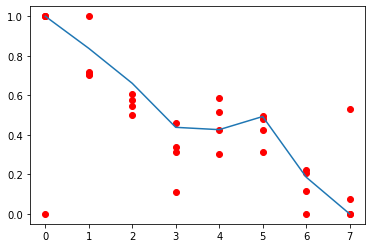

In [3]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xy_scaled = scaler.fit_transform(xy)
x_train_n = xy_scaled[:, 0:-1]
y_train_n = xy_scaled[:, [-1]]
plt.plot(x_train_n, 'ro')
plt.plot(y_train_n)
plt.show()
x_train_n = np.asarray(x_train_n, dtype = np.float32)
y_train_n = np.asarray(y_train_n, dtype = np.float32)

In [5]:
num_classes = 1

W = tf.Variable(tf.random.normal([x_train_n.shape[1], num_classes]), name='weight')
b = tf.Variable(tf.random.normal([num_classes]), name='bias')

In [6]:
def hypothesis(X):
    return tf.matmul(X, W)+ b

def cost_fn(X, Y):
    return tf.reduce_mean(tf.square(hypothesis(X) - Y))

def grad(X, Y):
    with tf.GradientTape() as tape:
        loss_value = cost_fn(X, Y)
        return tape.gradient(loss_value, [W, b])

def accuracy_fn(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    is_correct = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

In [11]:
epoch = []
cost = []
acc = []
def fit(X, Y, epochs=1000, verbose=50, learning_rate=0.001):
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    
    for i in range(epochs):
        grads = grad(X, Y)
        optimizer.apply_gradients(zip(grads, [W, b]))
        epoch.append(i)
        cost.append(cost_fn(X,Y).numpy())
        acc.append(accuracy_fn(X,Y).numpy())
        if (i == 0) | ((i+1) % verbose == 0):
            print('epoch: {}, cost: {:.4f}'.format(i+1, cost_fn(X, Y).numpy()))

In [12]:
fit(x_train_n, y_train_n)

epoch: 1, cost: 7.2526
epoch: 50, cost: 5.2434
epoch: 100, cost: 3.8349
epoch: 150, cost: 2.8697
epoch: 200, cost: 2.2068
epoch: 250, cost: 1.7502
epoch: 300, cost: 1.4343
epoch: 350, cost: 1.2145
epoch: 400, cost: 1.0602
epoch: 450, cost: 0.9507
epoch: 500, cost: 0.8719
epoch: 550, cost: 0.8141
epoch: 600, cost: 0.7706
epoch: 650, cost: 0.7371
epoch: 700, cost: 0.7104
epoch: 750, cost: 0.6884
epoch: 800, cost: 0.6698
epoch: 850, cost: 0.6535
epoch: 900, cost: 0.6389
epoch: 950, cost: 0.6255
epoch: 1000, cost: 0.6130


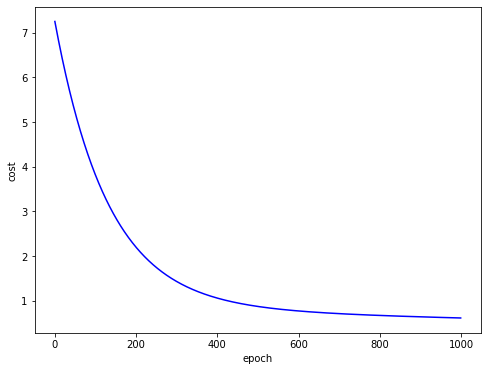

In [13]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(epoch, cost, "b")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()